# Predicting Water Pump Functionality in Tanzania (HydroLogic Project)
Authored by Farzaneh Gerami, Subaye Opoku-Acquah & Mariam Farda | 
March – June 2025

# Imports

In [544]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import f_oneway

import math

import datetime

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency, ttest_ind # checking if the data is random or depends on other

import joblib


# Sprint 1 - Data Cleaning and Preprocessing

## Read Merged Data

In [545]:
# Read Merged data as an original data
url_merge_data = "../data/processed/Merged_Training_Set.csv"
df_train = pd.read_csv(url_merge_data)
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [546]:
df_train.shape

(59400, 41)

# Split the data to 80% train and 20%validate

In [547]:
"""# split using train_test_split with shuffled=False to preserve order
train_size = int(len(df_train_original) * 0.8)
df_train = df_train_original.iloc[:train_size]
df_test = df_train_original.iloc[train_size:]

# Save the splits
df_train.to_csv("../data/processed/Merged_Training_data.csv", index=False)
df_test.to_csv("../data/processed/Merged_Test_data.csv", index=False)"""

'# split using train_test_split with shuffled=False to preserve order\ntrain_size = int(len(df_train_original) * 0.8)\ndf_train = df_train_original.iloc[:train_size]\ndf_test = df_train_original.iloc[train_size:]\n\n# Save the splits\ndf_train.to_csv("../data/processed/Merged_Training_data.csv", index=False)\ndf_test.to_csv("../data/processed/Merged_Test_data.csv", index=False)'

In [548]:
#df_test.shape

In [549]:
df_train.shape

(59400, 41)

In [550]:
# make a copy of the original dataset
df_train = df_train.copy()
df_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [551]:
# df_train.dtypes

## Feature Summary

In [552]:
# Basic summary statics
def feature_summary(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Zero Values': (df == 0).sum(),
        'Unique Values': df.nunique()
    })
    # Add Percent of Missing Values
    summary['% Missing'] = (summary['Missing Values'] / len(df)) * 100
    
    # Classify Feature Type
    def classify_feature(col):
        if df[col].dtype == 'object':
            return 'Categorical'
        elif df[col].dtype in ['int64', 'float64']:
            if df[col].nunique() < 15:
                return 'Ordinal/Categorical'
            return 'Numerical'
        elif df[col].dtype == 'bool':
            return 'Boolean'
        elif 'date' in col:
            return 'Date'
        else:
            return 'Other'
    # Applies the classifier to each column.
    summary['Feature Type'] = summary.index.to_series().apply(classify_feature)
    return summary.sort_values(by='Missing Values', ascending=False)

# Run the summary
feature_summary(df_train)


,Data Type,Missing Values,Zero Values,Unique Values,% Missing,Feature Type
scheme_name,object,28166,0,2696,47.417508,Categorical
scheme_management,object,3877,0,12,6.526936,Categorical
installer,object,3655,0,2145,6.153199,Categorical
funder,object,3635,0,1897,6.119529,Categorical
public_meeting,object,3334,5055,2,5.612795,Categorical
permit,object,3056,17492,2,5.144781,Categorical
subvillage,object,371,0,19287,0.624579,Categorical
payment,object,0,0,7,0.000000,Categorical
waterpoint_type_group,object,0,0,6,0.000000,Categorical
extraction_type_group,object,0,0,13,0.000000,Categorical


In [553]:
# make a list of the columns with missing values
summary = feature_summary(df_train)

missing_columns = summary[summary['Missing Values'] > 0].index.tolist()
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
['scheme_name', 'scheme_management', 'installer', 'funder', 'public_meeting', 'permit', 'subvillage']


## Convert date_recorded to datetime

In [554]:
# Convert date_recorded to datetime
df_train['date_recorded'] = pd.to_datetime(df_train['date_recorded'], errors='coerce')

# Remove invalid years
df_train.loc[df_train['construction_year'] < 1900, 'construction_year'] = pd.NA

# Convert the year into datetime (January 1st of the year)
df_train['construction_year'] = pd.to_datetime(
    df_train['construction_year'], format='%Y', errors='coerce'
)

In [555]:
# Extract date features
df_train['year_recorded'] = df_train['date_recorded'].dt.year
df_train['month_recorded'] = df_train['date_recorded'].dt.month
df_train['dayofweek_recorded'] = df_train['date_recorded'].dt.dayofweek


# Clean and Convert public_meeting


In [556]:
# Convert to string, clean casing and spaces, then map to booleans
df_train['public_meeting'] = df_train['public_meeting'].astype(str).str.strip().str.lower()
df_train['public_meeting'] = df_train['public_meeting'].map({'true': True, 'false': False})
df_train['public_meeting'] = df_train['public_meeting'].astype('boolean')

## Clean and Convert permit to boolean


In [557]:
# Clean and Convert permit
df_train['permit'] = df_train['permit'].astype(str).str.strip().str.lower()
df_train['permit'] = df_train['permit'].map({'true': True, 'false': False})
df_train['permit'] = df_train['permit'].astype('boolean')

# Check for Nulls


view all the rows with Standard missing values

In [558]:
print("\nMissing values:")
missing_counts = df_train.isnull().sum().sort_values(ascending=False)
print(missing_counts)


Missing values:
scheme_name              28166
construction_year        20709
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
quantity                     0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
source                       0
quantity_group               0
extraction_type_class        0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
year_recorded                0
month_recorded               0
management                   0
id                           0
extraction_type_group        0
extraction_type              0
date_recorded                0
gps_height                   0
longitude                    0
latitude              

find rows with placeholder missing strings

In [559]:
# Create a list of columns with missing values
missing_columns = missing_counts[missing_counts > 0].index.tolist()
print("\nColumns with missing values:")
print(missing_columns)


Columns with missing values:
['scheme_name', 'construction_year', 'scheme_management', 'installer', 'funder', 'public_meeting', 'permit', 'subvillage']


# showing the categorical columns

In [560]:
# showing the categorical columns
categorical_col = df_train.select_dtypes(include=['object', 'category', 'boolean']).columns
missing_info = pd.DataFrame({
    'Data Type': df_train[categorical_col].dtypes,
    'Missing %': (df_train[categorical_col].isnull().mean()*100)
})
missing_info = missing_info.sort_values(by= 'Missing %', ascending=False)
print(missing_info)

                      Data Type  Missing %
scheme_name              object  47.417508
scheme_management        object   6.526936
installer                object   6.153199
funder                   object   6.119529
public_meeting          boolean   5.612795
permit                  boolean   5.144781
subvillage               object   0.624579
water_quality            object   0.000000
quality_group            object   0.000000
quantity                 object   0.000000
quantity_group           object   0.000000
payment                  object   0.000000
source                   object   0.000000
source_type              object   0.000000
source_class             object   0.000000
waterpoint_type          object   0.000000
waterpoint_type_group    object   0.000000
payment_type             object   0.000000
extraction_type_class    object   0.000000
management_group         object   0.000000
management               object   0.000000
extraction_type_group    object   0.000000
extraction_

## Impute Missing Values

## Checking for duplication

## Quantity and quantity_group duplication

In [561]:
# to check duplication between the quantity and quantity group
df_train['quantity_match'] = df_train['quantity'] == df_train['quantity_group']

match_counts = df_train['quantity_match'].value_counts()
print(match_counts)

True    59400
Name: quantity_match, dtype: int64


In [562]:
mismatches = df_train[df_train['quantity_match'] == False][['quantity', 'quantity_group']]
print(mismatches.head())

Empty DataFrame
Columns: [quantity, quantity_group]
Index: []


In [563]:
match_rate = df_train['quantity_match'].mean() * 100
print(f"Match Rate: {match_rate:.2f}%")

Match Rate: 100.00%


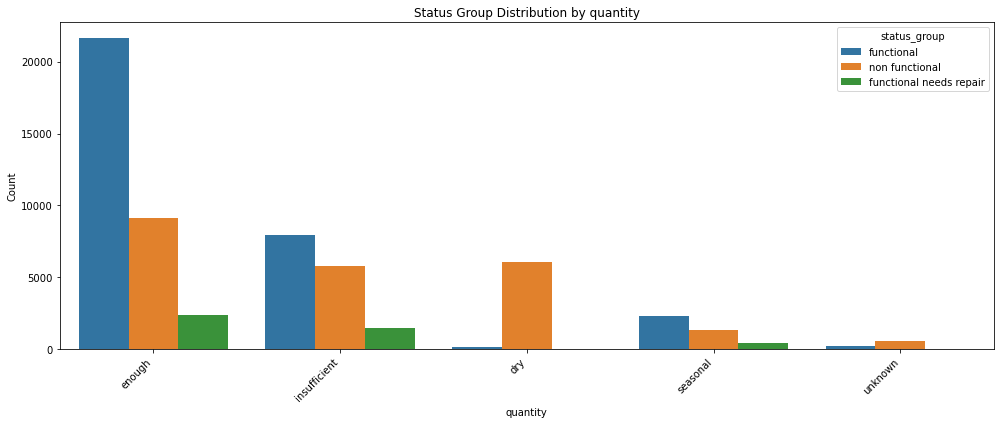

In [564]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='quantity', hue='status_group')
plt.title("Status Group Distribution by quantity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("quantity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

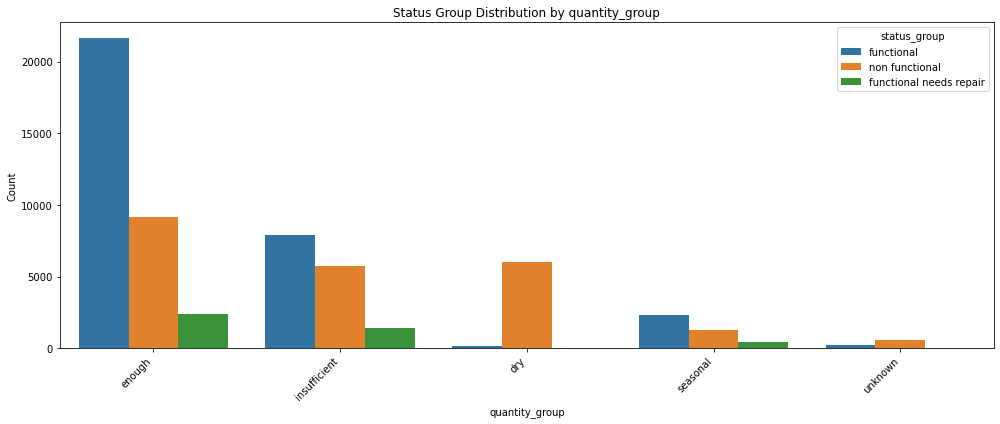

In [565]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='quantity_group', hue='status_group')
plt.title("Status Group Distribution by quantity_group")
plt.xticks(rotation=45, ha='right')
plt.xlabel("quantity_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: Yes, they are both similar and i drop the quantity_group

## extraction_type and extraction_type_group and extraction_type_class duplication

In [566]:
# looks for the mismatch between extraction_type and extraction_type_group
mismatched = df_train[df_train['extraction_type'].astype(str) != df_train['extraction_type_group'].astype(str)]
# Show a few rows where they differ
mismatched[['extraction_type', 'extraction_type_group']].head(10)

,extraction_type,extraction_type_group
31,ksb,submersible
45,windmill,wind-powered
66,other - rope pump,rope pump
88,ksb,submersible
92,ksb,submersible
96,ksb,submersible
147,other - rope pump,rope pump
155,other - swn 81,other handpump
172,ksb,submersible
193,ksb,submersible


In [567]:
# Count how often each mismatch occurs
mismatch_summary = mismatched.groupby(['extraction_type', 'extraction_type_group']).size().reset_index(name='count')
print(mismatch_summary.sort_values(by='count', ascending=False))


             extraction_type extraction_type_group  count
2                        ksb           submersible   1415
5          other - rope pump             rope pump    451
6             other - swn 81        other handpump    229
8                   windmill          wind-powered    117
0                       cemo       other motorpump     90
4          other - play pump        other handpump     85
7                     walimi        other handpump     48
1                     climax       other motorpump     32
3  other - mkulima/shinyanga        other handpump      2


In [568]:
matched = df_train[df_train['extraction_type'] == df_train['extraction_type_group']]
# Show a few rows where they differ
mismatched[['extraction_type', 'extraction_type_group']].head(10)

,extraction_type,extraction_type_group
31,ksb,submersible
45,windmill,wind-powered
66,other - rope pump,rope pump
88,ksb,submersible
92,ksb,submersible
96,ksb,submersible
147,other - rope pump,rope pump
155,other - swn 81,other handpump
172,ksb,submersible
193,ksb,submersible


In [569]:
# Count how often each mismatch occurs
match_summary = matched.groupby(['extraction_type', 'extraction_type_group']).size().reset_index(name='count')
print(match_summary.sort_values(by='count', ascending=False))


  extraction_type extraction_type_group  count
1         gravity               gravity  26780
5     nira/tanira           nira/tanira   8154
6           other                 other   6430
7     submersible           submersible   4764
8          swn 80                swn 80   3670
4            mono                  mono   2865
2   india mark ii         india mark ii   2400
0         afridev               afridev   1770
3  india mark iii        india mark iii     98


My conclusion is that i can drop this column as it is so similar to eachother but the extraction_type_group is with less detailed. The same i observe for the waterpoint_type and waterpoint_type_group, and i decided to keep the waterpoint_type_group. 

In [570]:
# duplicate between 'extraction_type', 'extraction_type_group', 'extraction_type_class'
columns = ['extraction_type', 'extraction_type_group', 'extraction_type_class']

for col in columns:
    print(f"\n {col} — Unique Values and Frequencies:\n{'-'*50}")
    
    # Get value counts (number and percent)
    counts = df_train[col].value_counts(dropna=False)
    percentages = df_train[col].value_counts(normalize=True, dropna=False) * 100

    # Combine into a single DataFrame
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)
    })
    
    # Print top values
    print(summary.head(10)) 



 extraction_type — Unique Values and Frequencies:
--------------------------------------------------
                   Count  Percentage
gravity            26780       45.08
nira/tanira         8154       13.73
other               6430       10.82
submersible         4764        8.02
swn 80              3670        6.18
mono                2865        4.82
india mark ii       2400        4.04
afridev             1770        2.98
ksb                 1415        2.38
other - rope pump    451        0.76

 extraction_type_group — Unique Values and Frequencies:
--------------------------------------------------
                Count  Percentage
gravity         26780       45.08
nira/tanira      8154       13.73
other            6430       10.82
submersible      6179       10.40
swn 80           3670        6.18
mono             2865        4.82
india mark ii    2400        4.04
afridev          1770        2.98
rope pump         451        0.76
other handpump    364        0.61

 extract

In [571]:
# Create a column to flag mismatches
df_train['extraction_mismatch'] = ~(
    (df_train['extraction_type'] == df_train['extraction_type_group']) &
    (df_train['extraction_type'] == df_train['extraction_type_class']) &
    (df_train['extraction_type_group'] == df_train['extraction_type_class'])
)

#Filter mismatched rows
mismatches = df_train[df_train['extraction_mismatch']][[
    'extraction_type', 'extraction_type_group', 'extraction_type_class'
]]

#Summarize mismatch patterns
mismatch_summary = mismatches.groupby([
    'extraction_type', 'extraction_type_group', 'extraction_type_class'
]).size().reset_index(name='count').sort_values(by='count', ascending=False)

# print top 10 mismatch patterns
print(mismatch_summary.head(10))


      extraction_type extraction_type_group extraction_type_class  count
7         nira/tanira           nira/tanira              handpump   8154
12             swn 80                swn 80              handpump   3670
6                mono                  mono             motorpump   2865
3       india mark ii         india mark ii              handpump   2400
0             afridev               afridev              handpump   1770
5                 ksb           submersible           submersible   1415
10  other - rope pump             rope pump             rope pump    451
11     other - swn 81        other handpump              handpump    229
14           windmill          wind-powered          wind-powered    117
4      india mark iii        india mark iii              handpump     98


So i decided to keep the less details classification. Later we need to check if there is any relation between the extraction_type_class and the target

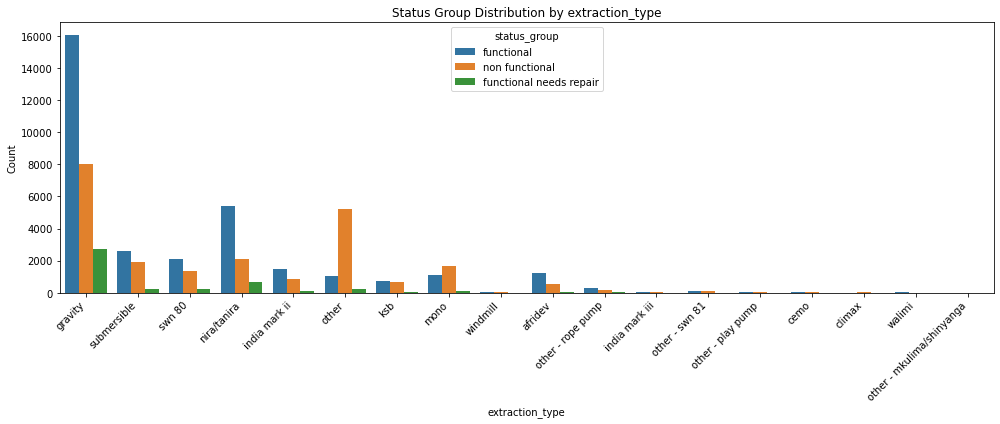

In [572]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='extraction_type', hue='status_group')
plt.title("Status Group Distribution by extraction_type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("extraction_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

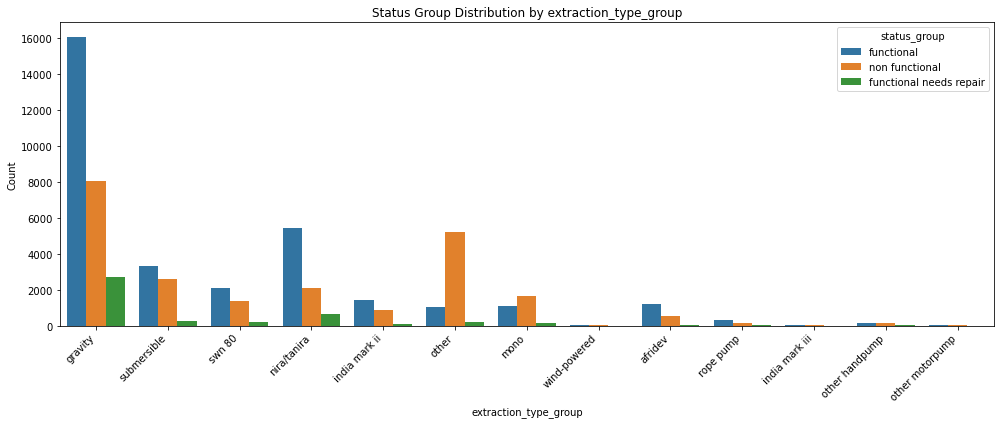

In [573]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='extraction_type_group', hue='status_group')
plt.title("Status Group Distribution by extraction_type_group")
plt.xticks(rotation=45, ha='right')
plt.xlabel("extraction_type_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

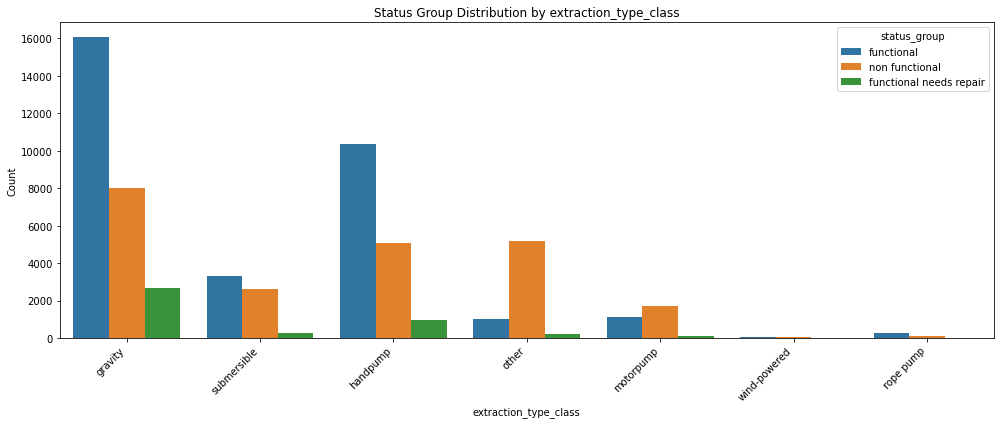

In [574]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='extraction_type_class', hue='status_group')
plt.title("Status Group Distribution by extraction_type_class")
plt.xticks(rotation=45, ha='right')
plt.xlabel("extraction_type_class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: we decided to keep the extraction_type_class as it more comprehensive and drop the extraction_type and extraction_type_group.. 

## waterpoint_type and waterpoint_type_group duplication

In [575]:
# Calculate row-wise match
match_mask = df_train['waterpoint_type'] == df_train['waterpoint_type_group']

# Percentage of exact matches
match_percentage = match_mask.mean() * 100
print(f"Match Rate: {match_percentage:.2f}%")

# Count of matching vs mismatching rows
match_counts = match_mask.value_counts()
print("\nMatch vs Mismatch Counts:")
print(match_counts)

# show mismatched combinations
mismatches = df_train[~match_mask][['waterpoint_type', 'waterpoint_type_group']]
mismatch_summary = mismatches.groupby(
    ['waterpoint_type', 'waterpoint_type_group']
).size().reset_index(name='count').sort_values(by='count', ascending=False)

print("\nTop Mismatch Patterns:")
print(mismatch_summary.head(10))


Match Rate: 89.73%

Match vs Mismatch Counts:
True     53297
False     6103
dtype: int64

Top Mismatch Patterns:
               waterpoint_type waterpoint_type_group  count
0  communal standpipe multiple    communal standpipe   6103


In [576]:
# Count how often each mismatch occurs
mismatch_summary = mismatched.groupby(['waterpoint_type', 'waterpoint_type_group']).size().reset_index(name='count')
print(mismatch_summary.sort_values(by='count', ascending=False))


               waterpoint_type waterpoint_type_group  count
1           communal standpipe    communal standpipe   1293
4                    hand pump             hand pump    713
2  communal standpipe multiple    communal standpipe    389
5                        other                 other     70
0                cattle trough         cattle trough      3
3                          dam                   dam      1


interpretation: they are almost similar. in waterpoint_type there is one type communal standpoint multiple that it is changed to communal standpipe in the other. So i prefer to keep the waterpoint_type maybe this multiple type has any impact on functionality of pupm.

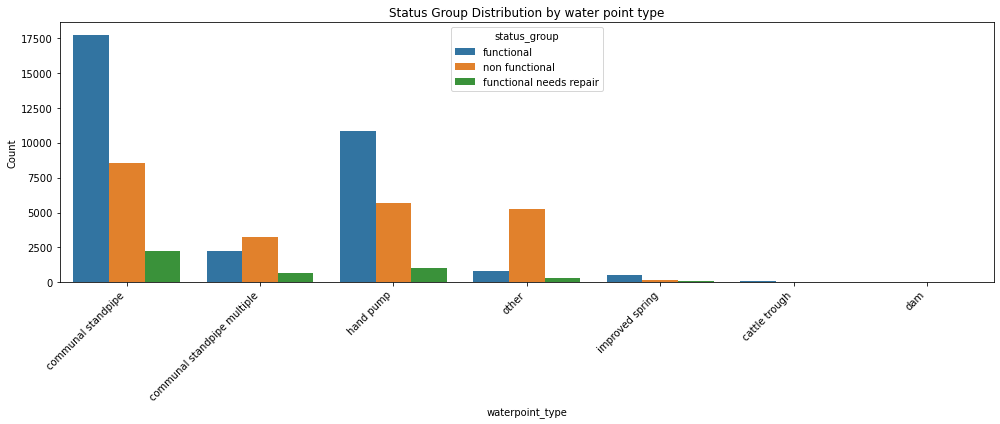

In [577]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='waterpoint_type', hue='status_group')
plt.title("Status Group Distribution by water point type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("waterpoint_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

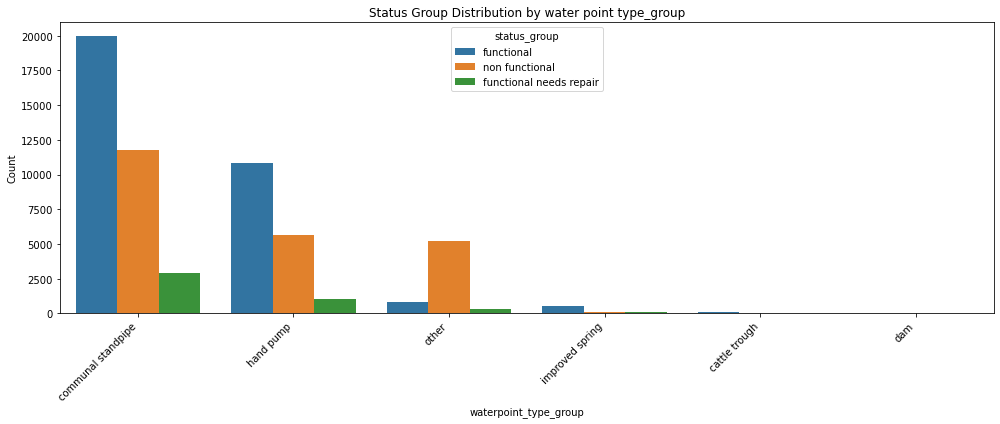

In [578]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='waterpoint_type_group', hue='status_group')
plt.title("Status Group Distribution by water point type_group")
plt.xticks(rotation=45, ha='right')
plt.xlabel("waterpoint_type_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Source and Source_type duplication

In [579]:
# Count how often each mismatch occurs
mismatch_summary = mismatched.groupby(['source', 'source_type']).size().reset_index(name='count')
print(mismatch_summary.sort_values(by='count', ascending=False))


                 source           source_type  count
6                 river            river/lake    833
3           machine dbh              borehole    544
7          shallow well          shallow well    384
8                spring                spring    196
0                   dam                   dam    181
2                  lake            river/lake    143
1              hand dtw              borehole    118
5  rainwater harvesting  rainwater harvesting     63
4                 other                 other      4
9               unknown                 other      3


In [580]:
# Check for exact matches
match_mask = df_train['source'] == df_train['source_type']
match_percentage = match_mask.mean() * 100
print(f" Match Rate between 'source' and 'source_type': {match_percentage:.2f}%")

 Match Rate between 'source' and 'source_type': 62.30%


In [581]:
# View mismatch patterns
mismatches = df_train[~match_mask][['source', 'source_type']]
mismatch_summary = mismatches.groupby(['source', 'source_type']).size().reset_index(name='count')
print("\nTop mismatches:")
print(mismatch_summary.sort_values(by='count', ascending=False).head(10))


Top mismatches:
        source source_type  count
2  machine dbh    borehole  11075
3        river  river/lake   9612
0     hand dtw    borehole    874
1         lake  river/lake    765
4      unknown       other     66


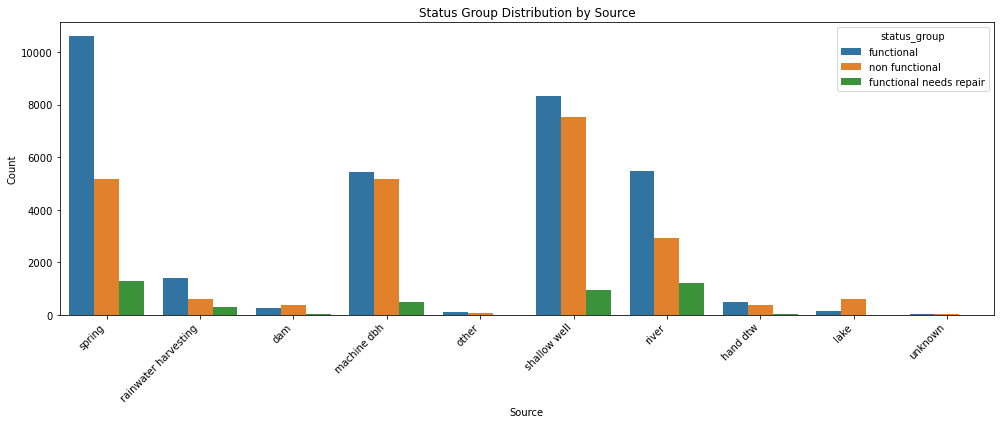

In [582]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='source', hue='status_group')
plt.title("Status Group Distribution by Source")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Source")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

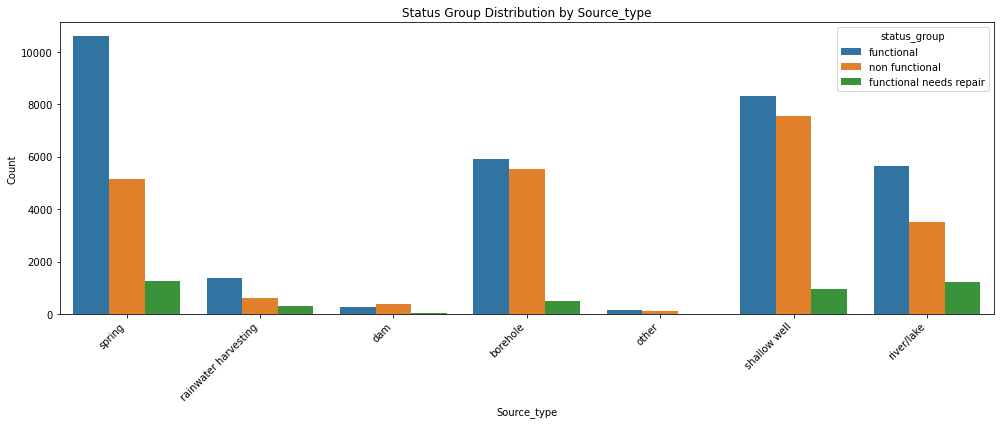

In [583]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='source_type', hue='status_group')
plt.title("Status Group Distribution by Source_type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Source_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: I think i will keep the source and delete the source type. They are similar and the relation between them and the status group also is similar but in source the river and lake are seperated and their relation with target is also different.

## Payment and Peyment_type duplication

In [584]:
# Check for exact matches
match_mask = df_train['payment'] == df_train['payment_type']
match_percentage = match_mask.mean() * 100
print(f" Match Rate between 'payment' and 'payment_type': {match_percentage:.2f}%")

 Match Rate between 'payment' and 'payment_type': 58.18%


In [585]:
# View mismatch patterns
mismatches = df_train[~match_mask][['payment', 'payment_type']]
mismatch_summary = mismatches.groupby(['payment', 'payment_type']).size().reset_index(name='count')
print("\nTop mismatches:")
print(mismatch_summary.sort_values(by='count', ascending=False).head(10))


Top mismatches:
                 payment payment_type  count
2         pay per bucket   per bucket   8985
1            pay monthly      monthly   8300
3  pay when scheme fails   on failure   3914
0           pay annually     annually   3642


Interpretation: payment and payment_type are similar better to drop payment as the classification topic is better in payment_type.

# Installer and Funder

In [586]:
df_train['installer'] = df_train['installer'].astype(str).str.strip().str.lower()
df_train['funder'] = df_train['funder'].astype(str).str.strip().str.lower()

In [587]:
# Check for exact matches
match_mask = df_train['installer'] == df_train['funder']
match_percentage = match_mask.mean() * 100
print(f" Match Rate between 'installer' and 'funder': {match_percentage:.2f}%")

 Match Rate between 'installer' and 'funder': 37.90%


Interpretation: I think we need to keep both

In [588]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,dayofweek_recorded,quantity_match,extraction_mismatch
0,69572,6000.0,2011-03-14,roman,1390,roman,34.938093,-9.856322,none,0,...,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,0,True,False
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,Zahanati,0,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,2,True,False
2,34310,25.0,2013-02-25,lottery club,686,world vision,37.460664,-3.821329,Kwa Mahundi,0,...,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,0,True,False
3,67743,0.0,2013-01-28,unicef,263,unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,0,True,False
4,19728,0.0,2011-07-13,action in a,0,artisan,31.130847,-1.825359,Shuleni,0,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,2,True,False


## Drop columns

In [589]:
# Drop some column
#columns_to_drop = ['recorded_by', 'num_private', 'quantity_group', 'extraction_type', 'extraction_type_group','waterpoint_type_group', 'source_type', 'payment', 'quantity_match', 'extraction_mismatch']
columns_to_drop = ['id','recorded_by', 'num_private', 'payment']

df_train.drop(columns = columns_to_drop, inplace = True)
print('droped successfuly!')

droped successfuly!


In [590]:
df_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,dayofweek_recorded,quantity_match,extraction_mismatch
0,6000.0,2011-03-14,roman,1390,roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,0,True,False
1,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,2,True,False
2,25.0,2013-02-25,lottery club,686,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,0,True,False
3,0.0,2013-01-28,unicef,263,unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,0,True,False
4,0.0,2011-07-13,action in a,0,artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,2,True,False


# Handling missing values

In [591]:
missing_counts = df_train.isna().sum().sort_values(ascending=False)
missing_counts

scheme_name              28166
construction_year        20709
scheme_management         3877
public_meeting            3334
permit                    3056
subvillage                 371
amount_tsh                   0
quantity_group               0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
source                       0
management                   0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
year_recorded                0
month_recorded               0
dayofweek_recorded           0
quantity_match               0
management_group             0
extraction_type              0
extraction_type_class        0
basin                        0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name

In [592]:
for col in df_train.columns:
    print(f"\nUnique values in column '{col}':")
    print(df_train[col].unique())


Unique values in column 'amount_tsh':
[6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03 1.63e+04 8.00e+02 1.60e+04 3.00e+04 5.30e+01
 5.40e+03 7.00e+04 2.50e+05 2.00e+05 2.60e+04 1.80e+04 2.60e+01 5.90e+02
 9.00e+02 9.00e+00 1.40e+03 1.70e+05 2.20e+02 3.80e+04 2.50e-01 1.20e+01
 6.00e+04 5.90e+01]

Unique values in column 'date_recorded':
['2011-03-14T00:00:00.0

In [593]:
missing_na = df_train.isna().sum().sort_values(ascending=False)
missing_na


scheme_name              28166
construction_year        20709
scheme_management         3877
public_meeting            3334
permit                    3056
subvillage                 371
amount_tsh                   0
quantity_group               0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
source                       0
management                   0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
year_recorded                0
month_recorded               0
dayofweek_recorded           0
quantity_match               0
management_group             0
extraction_type              0
extraction_type_class        0
basin                        0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name

In [594]:
# Define common non-standard missing values
placeholders = ['NaN', 'nan', 'N/A', 'null', 'None', '?', '']

# Apply replacement only to object (string) columns
for col in df_train.select_dtypes(include='object').columns:
    df_train[col] = df_train[col].replace(placeholders, np.nan)

In [595]:
missing_na = df_train.isna().sum().sort_values(ascending=False)
missing_na


scheme_name              28810
construction_year        20709
scheme_management         3878
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
amount_tsh                   0
source                       0
quality_group                0
quantity                     0
quantity_group               0
waterpoint_type              0
source_type                  0
source_class                 0
payment_type                 0
waterpoint_type_group        0
status_group                 0
year_recorded                0
month_recorded               0
dayofweek_recorded           0
quantity_match               0
water_quality                0
extraction_type              0
management_group             0
management                   0
extraction_type_class        0
extraction_type_group        0
date_recorded                0
population                   0
ward    

In [596]:
print(df_train.isna().sum()[df_train.isna().sum() > 0])


funder                3635
installer             3655
wpt_name                 2
subvillage             371
public_meeting        3334
scheme_management     3878
scheme_name          28810
permit                3056
construction_year    20709
dtype: int64


### Check the Type of Each Column

In [597]:
# Show types of columns with missing values
missing_cols = df_train.columns[df_train.isnull().any()]
print(df_train[missing_cols].dtypes)

funder                       object
installer                    object
wpt_name                     object
subvillage                   object
public_meeting              boolean
scheme_management            object
scheme_name                  object
permit                      boolean
construction_year    datetime64[ns]
dtype: object


### Explore the Distribution and Value Counts

In [598]:
for col in missing_cols:
    print(f"\n {col} value counts:")
    print(df_train[col].value_counts(dropna=False).head(10))



 funder value counts:
government of tanzania    9084
NaN                       3635
danida                    3114
hesawa                    2202
rwssp                     1374
world bank                1349
kkkt                      1287
world vision              1246
unicef                    1057
tasaf                      877
Name: funder, dtype: int64

 installer value counts:


dwe                 17405
NaN                  3655
government           1891
hesawa               1395
rwe                  1206
commu                1065
danida               1050
district council      961
kkkt                  910
0                     777
Name: installer, dtype: int64

 wpt_name value counts:
none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Name: wpt_name, dtype: int64

 subvillage value counts:
Madukani    508
Shuleni     506
Majengo     502
Kati        373
NaN         371
Mtakuja     262
Sokoni      232
M           187
Muungano    172
Mbuyuni     164
Name: subvillage, dtype: int64

 public_meeting value counts:
True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: Int64

 scheme_management value counts:
VWC                 36793
WUG                  5206
N

### Check Dependency with Other Features (Chi-square and T-test)

In [599]:

cat_cols = df_train.select_dtypes(include=['object', 'category', 'bool']).columns
num_cols = df_train.select_dtypes(include=['number']).columns

for target_col in missing_cols:
    mask = df_train[target_col].isnull()
    print(f"\n Analyzing missingness in: {target_col}")

    # Chi-square for categorical
    for cat_col in cat_cols:
        if cat_col != target_col and cat_col not in missing_cols and df_train[cat_col].nunique() > 1:
            contingency = pd.crosstab(df_train[cat_col], mask)
            if contingency.shape[1] == 2:
                chi2, p, _, _ = chi2_contingency(contingency)
                if p < 0.05:
                    print(f" Dependent on categorical: {cat_col} (p={p:.4f})")

    # T-test for numerical
    for num_col in num_cols:
        if num_col != target_col and num_col not in missing_cols:
            group1 = df_train.loc[mask, num_col].dropna()
            group2 = df_train.loc[~mask, num_col].dropna()
            if len(group1) > 10 and len(group2) > 10:
                t_stat, p = ttest_ind(group1, group2, equal_var=False)
                if p < 0.05:
                    print(f" Dependent on numerical: {num_col} (p={p:.4f})")



 Analyzing missingness in: funder
 Dependent on categorical: basin (p=0.0000)
 Dependent on categorical: region (p=0.0000)
 Dependent on categorical: lga (p=0.0000)
 Dependent on categorical: ward (p=0.0000)
 Dependent on categorical: extraction_type (p=0.0000)
 Dependent on categorical: extraction_type_group (p=0.0000)
 Dependent on categorical: extraction_type_class (p=0.0000)
 Dependent on categorical: management (p=0.0000)
 Dependent on categorical: management_group (p=0.0000)
 Dependent on categorical: payment_type (p=0.0000)
 Dependent on categorical: water_quality (p=0.0000)
 Dependent on categorical: quality_group (p=0.0000)
 Dependent on categorical: quantity (p=0.0000)
 Dependent on categorical: quantity_group (p=0.0000)
 Dependent on categorical: source (p=0.0000)
 Dependent on categorical: source_type (p=0.0000)
 Dependent on categorical: source_class (p=0.0000)
 Dependent on categorical: waterpoint_type (p=0.0000)
 Dependent on categorical: waterpoint_type_group (p=0.0000

Interpretation: You found that all columns with missing values are strongly dependent on other features (p ≈ 0.0000), so the data is Missing At Random (MAR).This justifies group-based or model-based imputations — not naive (mean/mode) filling.

### Visual Check of Missingness Correlation

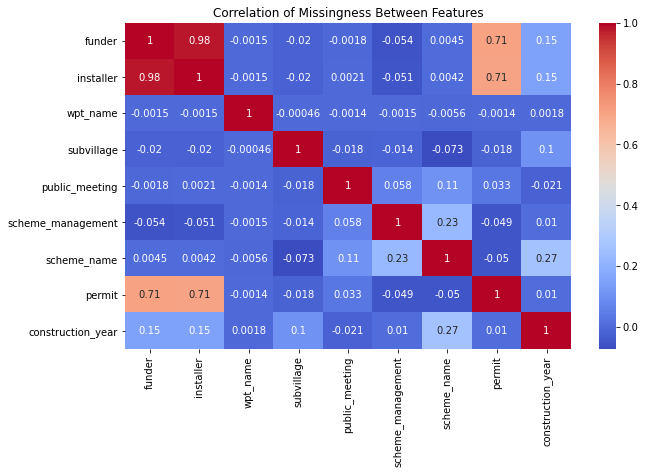

In [600]:
# Create a binary missingness matrix
missing_indicator = df_train[missing_cols].isnull().astype(int)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_indicator.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation of Missingness Between Features")
plt.show()

interpritation: 

## Imputing the values 

## Chi-square tests for categorical features and t-tests for numerical features, checking whether their distribution is associated with missing values in each column

we need to determine whether data is missing completely at random (MCAR) or if missingness is related to other variables, which is critical for deciding how to handle missing values. 

Chi-square for categorical.
T-test for numerical.

In [601]:

# Identify columns with missing values
cols_with_missing = df_train.columns[df_train.isna().any()].tolist()
cols_with_missing

['funder',
 'installer',
 'wpt_name',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year']

In [602]:
# Identify missing columns (excluding ID or target if needed)
cols_with_missing = df_train.columns[df_train.isnull().any()].tolist()

# Separate feature types
categorical_cols = df_train.select_dtypes(include=['object', 'category', 'bool']).columns
numerical_cols = df_train.select_dtypes(include=['number']).columns

# Initialize result collectors
chi2_results = []
ttest_results = []

# Loop over each missing column
for col in cols_with_missing:
    print(f"\nAnalyzing missingness in: {col}")
    missing_mask = df_train[col].isnull()

    # Chi-square for categorical variables
    for cat_col in categorical_cols:
        if cat_col != col and df_train[cat_col].nunique() > 1:
            contingency = pd.crosstab(df_train[cat_col], missing_mask)
            if contingency.shape[1] == 2:  # Make sure we have True/False columns
                try:
                    chi2, p, _, _ = chi2_contingency(contingency)
                    chi2_results.append({'missing_in': col, 'feature': cat_col, 'p_value': p})
                except Exception as e:
                    print(f"Chi2 failed for {col} vs {cat_col}: {e}")

    # T-test for numerical variables
    for num_col in numerical_cols:
        if num_col != col:
            group_missing = df_train.loc[missing_mask, num_col].dropna()
            group_not_missing = df_train.loc[~missing_mask, num_col].dropna()
            if len(group_missing) > 10 and len(group_not_missing) > 10:
                try:
                    t_stat, p = ttest_ind(group_missing, group_not_missing, equal_var=False)
                    ttest_results.append({'missing_in': col, 'feature': num_col, 'p_value': p})
                except Exception as e:
                    print(f"T-test failed for {col} vs {num_col}: {e}")





Analyzing missingness in: funder

Analyzing missingness in: installer

Analyzing missingness in: wpt_name

Analyzing missingness in: subvillage

Analyzing missingness in: public_meeting

Analyzing missingness in: scheme_management

Analyzing missingness in: scheme_name

Analyzing missingness in: permit

Analyzing missingness in: construction_year


# why I did this: this shows why data is missing. if it is MCAR i can drop missing data or impute with simple methods.
# if MAR or MNAR then i need more advanced imputation (like modeling or multiple imputation)

 A low p_value (commonly < 0.05) means that the missingness in one column is statistically likely to depend on the values in another column.

In [603]:
# Create result DataFrames
chi2_df = pd.DataFrame(chi2_results).sort_values(by='p_value')
ttest_df = pd.DataFrame(ttest_results).sort_values(by='p_value')

# Show top associations
print("\n Top Categorical Dependencies (Chi-square):")
print(chi2_df[chi2_df['p_value'] < 0.05].head())

print("\n Top Numerical Dependencies (T-test):")
print(ttest_df[ttest_df['p_value'] < 0.05].head())


 Top Categorical Dependencies (Chi-square):
            missing_in                feature  p_value
0               funder              installer      0.0
153  scheme_management  extraction_type_class      0.0
154  scheme_management             management      0.0
155  scheme_management       management_group      0.0
156  scheme_management           payment_type      0.0

 Top Numerical Dependencies (T-test):
           missing_in         feature  p_value
27         subvillage   year_recorded      0.0
52        scheme_name       longitude      0.0
51        scheme_name      gps_height      0.0
58        scheme_name  month_recorded      0.0
72  construction_year       longitude      0.0


Interpretation: A p-value of 0 means that the null hypothesis ("The distribution of the feature is the same for missing and non-missing rows.") is strongly rejected.So, The feature is strongly associated with whether the value is missing — the data is not missing completely at random (Not MCAR).This suggests the missingness is Missing at Random (MAR) — it’s dependent on other observed features. So, imputation must consider other variables — using simple methods like mean/median imputation could introduce bias.
Model-based or conditional imputation is more appropriate.

# Impute funder by grouping with region, lga and ward

In [604]:
#Group by region/lga/ward and apply mode imputation
df_train['funder'] = df_train.groupby(['region', 'lga', 'ward'])['funder'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
    )
#Fill any remaining missing values with the global mode
if df_train['funder'].isnull().any():
        overall_mode = df_train['funder'].mode()[0]
        df_train['funder'].fillna(overall_mode, inplace=True)

# Impute installer grouping with funder and region

In [605]:
#Group by region/lga/ward and apply mode imputation
df_train['installer'] = df_train.groupby(['region', 'funder'])['installer'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
    )
#Fill any remaining missing values with the global mode
if df_train['installer'].isnull().any():
        overall_mode = df_train['installer'].mode()[0]
        df_train['installer'].fillna(overall_mode, inplace=True)

### Impute wpt_name with unknown 

In [606]:
df_train['wpt_name'] = df_train['wpt_name'].fillna("unknown")
print("wpt_name missing values filled sucessfully!")

wpt_name missing values filled sucessfully!


### Impute subvillage missing values grouping with ward and lga

In [607]:
#Group by lga/ward and apply mode imputation
df_train['subvillage'] = df_train.groupby(['lga', 'ward'])['funder'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
    )
#Fill any remaining missing values with the global mode
if df_train['subvillage'].isnull().any():
        overall_mode = df_train['subvillage'].mode()[0]
        df_train['subvillage'].fillna(overall_mode, inplace=True)

### Impute Public_meeting missing values by grouping with region and ward

In [608]:
# group by region and ward and apply mode imputation
df_train['public_meeting'] = df_train.groupby(['region', 'ward'])['public_meeting'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

# fill any remaining missing values with the global mode
if df_train['public_meeting'].isnull().any():
    overall_mode = df_train['public_meeting'].mode()[0]
    df_train['public_meeting'].fillna(overall_mode, inplace=True)

### Impute scheme_name missing values by grouping with region and basin

In [609]:
# group by region and ward and apply mode imputation
df_train['scheme_name'] = df_train.groupby(['basin', 'region', 'longitude', 'latitude'])['scheme_name'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

# fill any remaining missing values with the global mode
if df_train['scheme_name'].isnull().any():
    overall_mode = df_train['scheme_name'].mode()[0]
    df_train['scheme_name'].fillna(overall_mode, inplace=True)

### Impute scheme_management missing values by grouping with schemen_name and source

In [610]:
# Group by scheme_name, source, and region (no leading space)
df_train['scheme_management'] = df_train.groupby(['scheme_name', 'source', 'region'])['scheme_management'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

# Fill any remaining missing values with the global mode
if df_train['scheme_management'].isnull().any():
    overall_mode = df_train['scheme_management'].mode()[0]
    df_train['scheme_management'].fillna(overall_mode, inplace=True)


### Impute permit missing values by grouping with region and source

In [611]:
# group by region and ward and apply mode imputation
df_train['permit'] = df_train.groupby(['region', 'source'])['permit'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

# fill any remaining missing values with the global mode
if df_train['permit'].isnull().any():
    overall_mode = df_train['permit'].mode()[0]
    df_train['permit'].fillna(overall_mode, inplace=True)

# Impute construction_year using Iterative Imputer

In [612]:
# Convert construction_year to integer
# Extract year from datetime
df_train['construction_year'] = df_train['construction_year'].dt.year


In [613]:
# Impute using numerical version and related predictors
# Select numerical columns for imputation
impute_cols = ['construction_year', 'population', 'latitude', 'longitude', 'gps_height']
impute_df = df_train[impute_cols]

# Apply Iterative Imputer
imp = IterativeImputer(estimator=BayesianRidge(), random_state=42, max_iter=10)
imputed_array = imp.fit_transform(impute_df)

# Assign imputed values back
df_train[impute_cols] = imputed_array

In [614]:
# Convert back to datetime (round and clip if necessary to valid ranges)
df_train['construction_year'] = df_train['construction_year'].astype(int)

# Optionally drop the helper column
#df_train.drop(columns=['construction_year_numeric'], inplace=True)


In [615]:
df_train.dtypes

amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                      float64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                      float64
public_meeting                  boolean
scheme_management                object
scheme_name                      object
permit                          boolean
construction_year                 int32
extraction_type                  object
extraction_type_group            object
extraction_type_class            object
management                       object


In [616]:
# we already save the recoded_date to day and month and year and now we drop the column
df_train.drop(columns=['date_recorded'], inplace=True)

In [617]:
missing_counts = df_train.isna().sum().sort_values(ascending=False)
missing_counts

amount_tsh               0
extraction_type_group    0
management               0
management_group         0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
year_recorded            0
month_recorded           0
dayofweek_recorded       0
quantity_match           0
extraction_type_class    0
extraction_type          0
funder                   0
construction_year        0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
s

# Manage Zero Values

In [618]:
zero_columns = [col for col in df_train.columns if (df_train[col] == 0).sum() > 0 and df_train[col].dtype in ['int64', 'float64']]
zero_columns
#zero_columns.remove('id')


['amount_tsh',
 'gps_height',
 'longitude',
 'district_code',
 'population',
 'dayofweek_recorded']

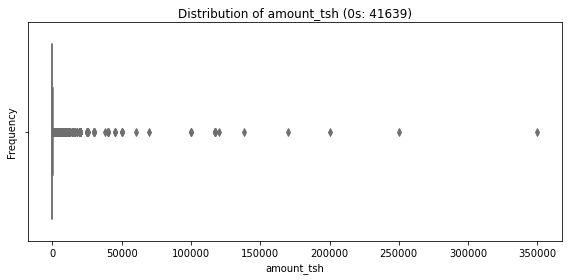

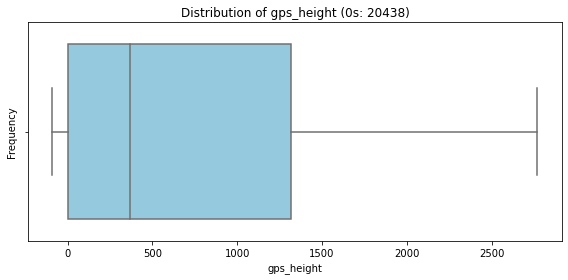

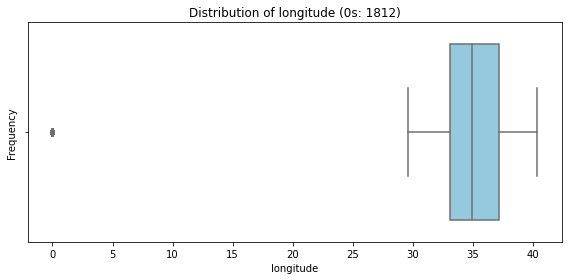

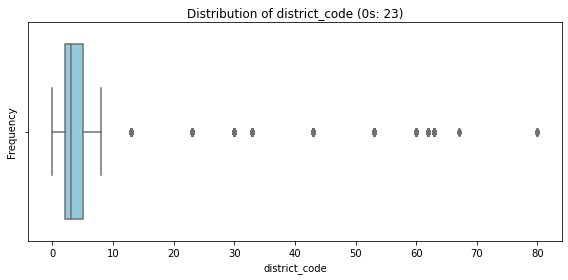

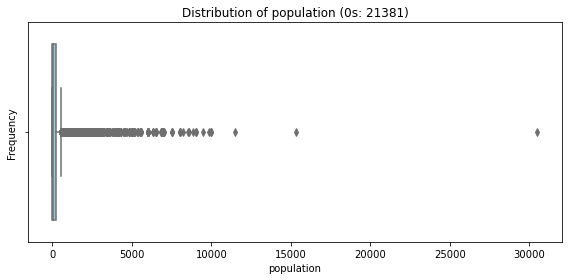

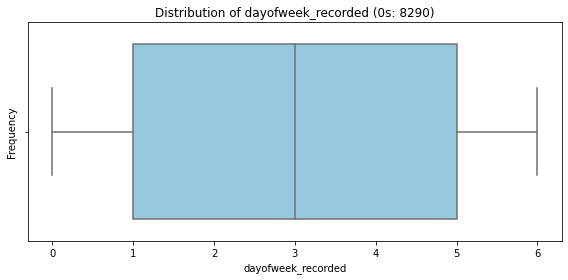

In [619]:
for col in zero_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_train[col], color='skyblue')
    plt.title(f'Distribution of {col} (0s: {(df_train[col] == 0).sum()})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()



## Statistical Indicators of Outliers

### Check if 0 Is Outside Typical Range (Using IQR)

In [620]:
def is_zero_outlier(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    return 0 < lower_bound


In [621]:
for col in df_train.select_dtypes(include='number'):
    if 0 in df_train[col].values and is_zero_outlier(df_train[col]):
        print(f"0 might be an outlier in column: {col}")


0 might be an outlier in column: longitude


### Distribution Analysis to check if 0 is far from Mean

In [622]:
for col in df_train.select_dtypes(include='number'):
    if 0 in df_train[col].values:
        mean = df_train[col].mean()
        std = df_train[col].std()
        z_score = abs((0 - mean) / std)
        if z_score > 3:
            print(f"0 is a statistical outlier in column: {col} (z-score: {z_score:.2f})")

0 is a statistical outlier in column: longitude (z-score: 5.19)


### Apply for Longitude

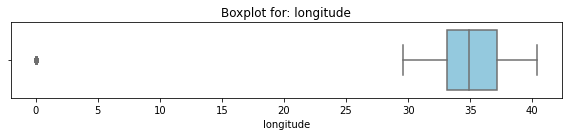

In [623]:
# Initial Boxplot of longitude (before fixing)
col = 'longitude'
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_train['longitude'], color='skyblue')
plt.title(f'Boxplot for: {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

In [624]:
# Replace 0s with NaN (assumed invalid for Tanzania)
df_train['longitude'] = df_train['longitude'].replace(0, np.nan)

# Impute with random values within Tanzania’s longitude range (29.2 to 40.4)
df_train['longitude'] = df_train['longitude'].apply(
    lambda x: np.random.uniform(29.2, 40.4) if pd.isna(x) else x
)


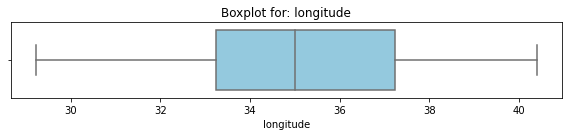

In [625]:
# Initial Boxplot of longitude (before fixing)
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_train['longitude'], color='skyblue')
plt.title(f'Boxplot for: {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

# check if the 0 is a placeholder

In [626]:
for col in df_train.select_dtypes(include='number'):
    zero_pct = (df_train[col] == 0).mean()
    if zero_pct > 0.1 and df_train[col].mean() > 0:  # Likely placeholder
        print(f"0 in {col} may be placeholder (zero_pct: {zero_pct:.2%})")


0 in amount_tsh may be placeholder (zero_pct: 70.10%)
0 in gps_height may be placeholder (zero_pct: 34.41%)
0 in population may be placeholder (zero_pct: 35.99%)
0 in dayofweek_recorded may be placeholder (zero_pct: 13.96%)


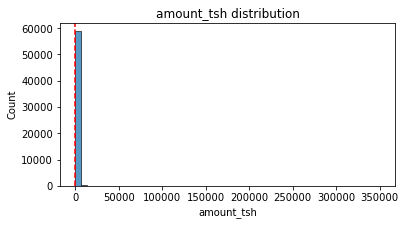

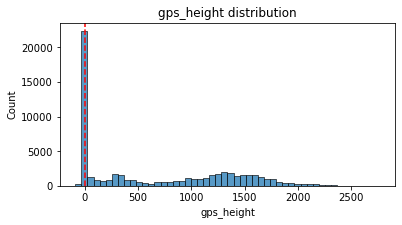

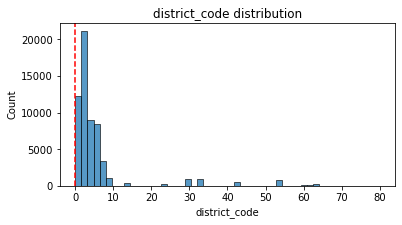

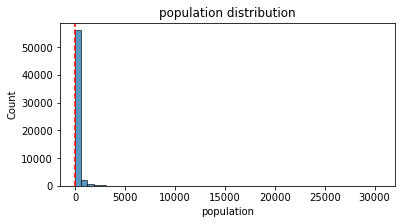

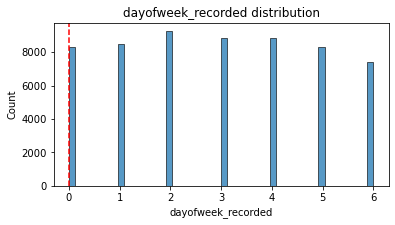

In [627]:
# visual Clues

for col in df_train.select_dtypes(include='number'):
    if 0 in df_train[col].values:
        plt.figure(figsize=(6, 3))
        sns.histplot(df_train[col], bins=50)
        plt.title(f'{col} distribution')
        plt.axvline(0, color='red', linestyle='--')
        plt.show()


## add some new features

In [628]:
df_train["funder_installer"] = df_train["funder"].astype(str) + "_" + df_train["installer"].astype(str)
df_train["funder_installer"]

0                              roman_roman
1                          grumeti_grumeti
2                lottery club_world vision
3                            unicef_unicef
4                      action in a_artisan
                       ...                
59395                  germany republi_ces
59396                     cefa-njombe_cefa
59397    government of tanzania_government
59398                           malec_musa
59399                     world bank_world
Name: funder_installer, Length: 59400, dtype: object

In [629]:
"""df_train["subvillage_funder_installer"] = (
    df_train["subvillage"].astype(str) + "_" +
    df_train["funder"].astype(str) + "_" +
    df_train["installer"].astype(str)
)
df_train["subvillage_funder_installer"]"""

'df_train["subvillage_funder_installer"] = (\n    df_train["subvillage"].astype(str) + "_" +\n    df_train["funder"].astype(str) + "_" +\n    df_train["installer"].astype(str)\n)\ndf_train["subvillage_funder_installer"]'

In [630]:
df_train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,dayofweek_recorded,quantity_match,extraction_mismatch,funder_installer
0,6000.0,roman,1390.0,roman,34.938093,-9.856322,none,Lake Nyasa,roman,Iringa,...,groundwater,communal standpipe,communal standpipe,functional,2011,3,0,True,False,roman_roman
1,0.0,grumeti,1399.0,grumeti,34.698766,-2.147466,Zahanati,Lake Victoria,grumeti,Mara,...,surface,communal standpipe,communal standpipe,functional,2013,3,2,True,False,grumeti_grumeti
2,25.0,lottery club,686.0,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,lottery club,Manyara,...,surface,communal standpipe multiple,communal standpipe,functional,2013,2,0,True,False,lottery club_world vision
3,0.0,unicef,263.0,unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,unicef,Mtwara,...,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,0,True,False,unicef_unicef
4,0.0,action in a,0.0,artisan,31.130847,-1.825359,Shuleni,Lake Victoria,action in a,Kagera,...,surface,communal standpipe,communal standpipe,functional,2011,7,2,True,False,action in a_artisan


## Save the cleaned data and read and check if there is any missing values

In [631]:
#df_train = df_train.drop(columns=['id']) 


In [632]:
# drop these columns
df_train = df_train.drop(columns = ['quantity_match', 'extraction_mismatch'], axis = 1, inplace=False)
# create new feature pump age
df_train["pump_age"] = df_train["year_recorded"] - df_train["construction_year"]
# create the new feature combining lat and long
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
df_train['location_cluster'] = kmeans.fit_predict(df_train[['latitude', 'longitude']])


In [633]:
df_train.to_csv("../data/processed/cleaned_Training_data.csv", index=False)
df_train.to_csv("../data/processed/pump_dataset_full_cleaned.csv", index=False)

In [634]:
df_train_cleaned= pd.read_csv("../data/processed/cleaned_Training_data.csv")

In [635]:
df_train_cleaned.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,dayofweek_recorded,funder_installer,pump_age,location_cluster
0,6000.0,roman,1390.0,roman,34.938093,-9.856322,none,Lake Nyasa,roman,Iringa,...,groundwater,communal standpipe,communal standpipe,functional,2011,3,0,roman_roman,12,2
1,0.0,grumeti,1399.0,grumeti,34.698766,-2.147466,Zahanati,Lake Victoria,grumeti,Mara,...,surface,communal standpipe,communal standpipe,functional,2013,3,2,grumeti_grumeti,3,6
2,25.0,lottery club,686.0,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,lottery club,Manyara,...,surface,communal standpipe multiple,communal standpipe,functional,2013,2,0,lottery club_world vision,4,5
3,0.0,unicef,263.0,unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,unicef,Mtwara,...,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,0,unicef_unicef,27,4
4,0.0,action in a,0.0,artisan,31.130847,-1.825359,Shuleni,Lake Victoria,action in a,Kagera,...,surface,communal standpipe,communal standpipe,functional,2011,7,2,action in a_artisan,15,8


In [636]:

# Identify columns with missing values
cols_with_missing = df_train_cleaned.columns[df_train.isna().any()].tolist()
cols_with_missing

[]

In [637]:
missing_counts = df_train_cleaned.isnull().sum().sort_values(ascending=False)
missing_counts


amount_tsh               0
source_type              0
management               0
management_group         0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_class             0
funder                   0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
year_recorded            0
month_recorded           0
dayofweek_recorded       0
funder_installer         0
pump_age                 0
extraction_type_class    0
extraction_type_group    0
extraction_type          0
construction_year        0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
p

In [638]:
df_train_cleaned.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,dayofweek_recorded,funder_installer,pump_age,location_cluster
0,6000.0,roman,1390.0,roman,34.938093,-9.856322,none,Lake Nyasa,roman,Iringa,...,groundwater,communal standpipe,communal standpipe,functional,2011,3,0,roman_roman,12,2
1,0.0,grumeti,1399.0,grumeti,34.698766,-2.147466,Zahanati,Lake Victoria,grumeti,Mara,...,surface,communal standpipe,communal standpipe,functional,2013,3,2,grumeti_grumeti,3,6
2,25.0,lottery club,686.0,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,lottery club,Manyara,...,surface,communal standpipe multiple,communal standpipe,functional,2013,2,0,lottery club_world vision,4,5
3,0.0,unicef,263.0,unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,unicef,Mtwara,...,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,0,unicef_unicef,27,4
4,0.0,action in a,0.0,artisan,31.130847,-1.825359,Shuleni,Lake Victoria,action in a,Kagera,...,surface,communal standpipe,communal standpipe,functional,2011,7,2,action in a_artisan,15,8


In [639]:
df_train_cleaned.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'year_recorded', 'month_recorded', 'dayofweek_recorded',
       'funder_installer', 'pump_age', 'location_cluster'],
      dtype='object')

In [640]:
df_train_cleaned.dtypes

amount_tsh               float64
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population               float64
public_meeting              bool
scheme_management         object
scheme_name               object
permit                      bool
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source    

# Covert all data to numerical

### remove spaces 

In [641]:
# Strip Column Names
df_train_cleaned.columns = df_train.columns.str.strip()


### covert boolean to numerical

In [642]:
# Covert boolean to integer
bool_cols = df_train_cleaned.select_dtypes(include='bool').columns.tolist()
df_train_cleaned[bool_cols] = df_train_cleaned[bool_cols].astype(int)


In [643]:
for col in df_train_cleaned.columns:
    if df_train_cleaned[col].dropna().isin(['True', 'False']).all():
        df_train_cleaned[col] = df_train_cleaned[col].map({'True': 1, 'False': 0})


### droping the recorded date, while we have it in year, day and month

In [644]:
df_train_cleaned.dtypes

amount_tsh               float64
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population               float64
public_meeting             int32
scheme_management         object
scheme_name               object
permit                     int32
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source    

### convert objects to numerical

In [645]:
# Encode Categorical Columns
#Detect categorical columns
object_columns = df_train_cleaned.select_dtypes(include='object').columns.tolist()
object_columns.remove('status_group')  # remove the target
object_columns


['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'scheme_management',
 'scheme_name',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'funder_installer']

In [646]:
# Inspect each object column
for col in object_columns:
    unique_vals = df_train_cleaned[col].dropna().unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(unique_vals)}")
    print("Sample unique values:", unique_vals[:10])  # Show first 10 unique values



Column: funder
Number of unique values: 1897
Sample unique values: ['roman' 'grumeti' 'lottery club' 'unicef' 'action in a'
 'mkinga distric coun' 'dwsp' 'rwssp' 'wateraid' 'isingiro ho']

Column: installer
Number of unique values: 1935
Sample unique values: ['roman' 'grumeti' 'world vision' 'unicef' 'artisan' 'dwe' 'dwsp'
 'water aid' 'private' 'danida']

Column: wpt_name
Number of unique values: 37400
Sample unique values: ['none' 'Zahanati' 'Kwa Mahundi' 'Zahanati Ya Nanyumbu' 'Shuleni' 'Tajiri'
 'Kwa Ngomho' 'Tushirikiane' 'Kwa Ramadhan Musa' 'Kwapeto']

Column: basin
Number of unique values: 9
Sample unique values: ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']

Column: subvillage
Number of unique values: 1897
Sample unique values: ['roman' 'grumeti' 'lottery club' 'unicef' 'action in a'
 'mkinga distric coun' 'dwsp' 'rwssp' 'wateraid' 'isingiro ho']

Column: region
Number of unique values: 21
S

In [647]:
# Ordinal columns (with meaningful order)
ordinal_cols = ['quality_group', 'quantity', 'status_group']

# Nominal columns (unordered categories)
nominal_cols = list(set(object_columns) - set(ordinal_cols))


### Ordinal Encoding

In [648]:
from sklearn.preprocessing import OrdinalEncoder

# Define category order for each ordinal column
ordinal_mappings = {
    'quality_group': ['unknown', 'fluoride', 'colored', 'milky', 'salty', 'good'],
    'quantity': ['dry', 'insufficient', 'seasonal', 'unknown', 'enough']
}

# Encode each ordinal column
for col, order in ordinal_mappings.items():
    encoder = OrdinalEncoder(categories=[order])
    df_train_cleaned[col] = encoder.fit_transform(df_train_cleaned[[col]])

In [649]:
df_train_cleaned.dtypes

amount_tsh               float64
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population               float64
public_meeting             int32
scheme_management         object
scheme_name               object
permit                     int32
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment_type              object
water_quality             object
quality_group            float64
quantity                 float64
quantity_group            object
source    

### Clean High-Cardinality Nominal Columns

In [650]:
def reduce_categories(col, top_n=20):
    top = col.value_counts().nlargest(top_n).index
    return col.apply(lambda x: x if x in top else 'Other')

for col in nominal_cols:
    if df_train_cleaned[col].nunique() > 50:
        df_train_cleaned[col] = reduce_categories(df_train_cleaned[col])


### One-Hot Encode Nominal Columns

In [651]:
df_train_cleaned = pd.get_dummies(df_train_cleaned, columns=nominal_cols, drop_first=True)


In [652]:
df_train_cleaned.dtypes

amount_tsh           float64
gps_height           float64
longitude            float64
latitude             float64
region_code            int64
                      ...   
lga_Njombe             uint8
lga_Other              uint8
lga_Rungwe             uint8
lga_Same               uint8
lga_Singida Rural      uint8
Length: 311, dtype: object

In [653]:
# Status_group or target
# Define the order of categories
status_order = ['non functional', 'functional needs repair', 'functional']

# Create an OrdinalEncoder with the custom order
encoder = OrdinalEncoder(categories=[status_order])

# Apply the encoding
df_train_cleaned['status_group'] = encoder.fit_transform(df_train_cleaned[['status_group']])

# Preview the result
print(df_train_cleaned[['status_group']].head())

   status_group
0           2.0
1           2.0
2           2.0
3           0.0
4           2.0


In [654]:
# Print shape and show first few rows
print("Final shape:", df_train_cleaned.shape)
print(df_train_cleaned.head())

Final shape: (59400, 311)
   amount_tsh  gps_height  longitude   latitude  region_code  district_code  \
0      6000.0      1390.0  34.938093  -9.856322           11              5   
1         0.0      1399.0  34.698766  -2.147466           20              2   
2        25.0       686.0  37.460664  -3.821329           21              4   
3         0.0       263.0  38.486161 -11.155298           90             63   
4         0.0         0.0  31.130847  -1.825359           18              1   

   population  public_meeting  permit  construction_year  ...  lga_Magu  \
0       109.0               1       0               1999  ...         0   
1       280.0               0       1               2010  ...         0   
2       250.0               1       1               2009  ...         0   
3        58.0               1       1               1986  ...         0   
4         0.0               1       1               1996  ...         0   

   lga_Maswa  lga_Mbozi  lga_Meru  lga_Moshi Rur

In [655]:
# Save the splits
df_train_cleaned.to_csv("../data/processed/Cleaned_numerical_dataset.csv", index=False)

In [656]:
df_train_numerical = pd.read_csv('../data/processed/Cleaned_numerical_dataset.csv')

In [657]:
df_train_numerical.head()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,public_meeting,permit,construction_year,...,lga_Magu,lga_Maswa,lga_Mbozi,lga_Meru,lga_Moshi Rural,lga_Njombe,lga_Other,lga_Rungwe,lga_Same,lga_Singida Rural
0,6000.0,1390.0,34.938093,-9.856322,11,5,109.0,1,0,1999,...,0,0,0,0,0,0,1,0,0,0
1,0.0,1399.0,34.698766,-2.147466,20,2,280.0,0,1,2010,...,0,0,0,0,0,0,1,0,0,0
2,25.0,686.0,37.460664,-3.821329,21,4,250.0,1,1,2009,...,0,0,0,0,0,0,1,0,0,0
3,0.0,263.0,38.486161,-11.155298,90,63,58.0,1,1,1986,...,0,0,0,0,0,0,1,0,0,0
4,0.0,0.0,31.130847,-1.825359,18,1,0.0,1,1,1996,...,0,0,0,0,0,0,0,0,0,0


In [658]:
missing=df_train_numerical.isna().sum().sort_values(ascending=False)
missing

amount_tsh                          0
installer_dwe                       0
installer_tasaf                     0
installer_rwe                       0
installer_lga                       0
                                   ..
source_type_shallow well            0
source_type_river/lake              0
source_type_rainwater harvesting    0
source_type_other                   0
lga_Singida Rural                   0
Length: 311, dtype: int64

In [659]:
df_train_numerical['status_group']

0        2.0
1        2.0
2        2.0
3        0.0
4        2.0
        ... 
59395    2.0
59396    2.0
59397    2.0
59398    2.0
59399    2.0
Name: status_group, Length: 59400, dtype: float64

In [660]:
object_columns = df_train_numerical.select_dtypes(include='object').columns.tolist()
print("Object columns:", object_columns)


Object columns: []


In [661]:
df_train_cleaned.dtypes

amount_tsh           float64
gps_height           float64
longitude            float64
latitude             float64
region_code            int64
                      ...   
lga_Njombe             uint8
lga_Other              uint8
lga_Rungwe             uint8
lga_Same               uint8
lga_Singida Rural      uint8
Length: 311, dtype: object